In [106]:
import numpy as np
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])


<ipython-input-110-3156b6f4fb27>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

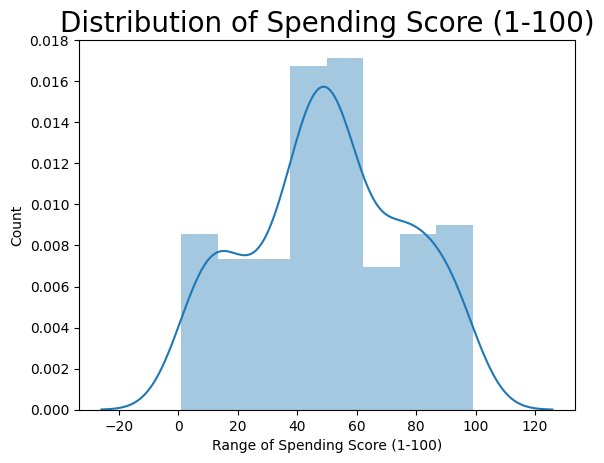

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Gender')

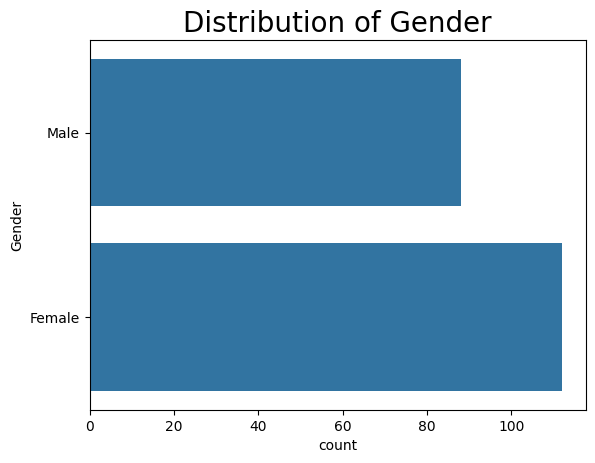

In [111]:
sns.countplot(data['Gender'])
plt.title('Distribution of Gender', fontsize = 20)

<ipython-input-112-eff1ded0c3a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

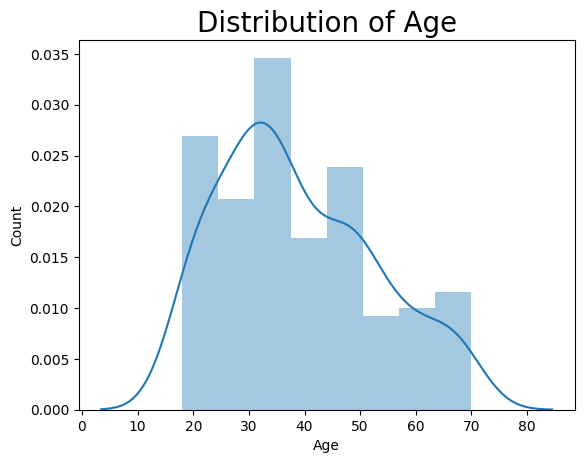

In [112]:
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

<ipython-input-113-6821089ff088>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

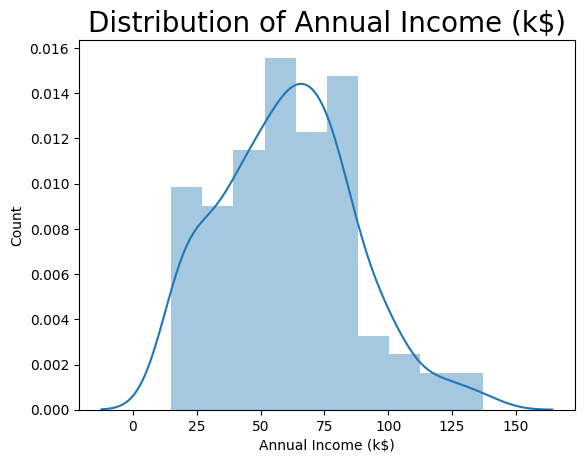

In [113]:
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

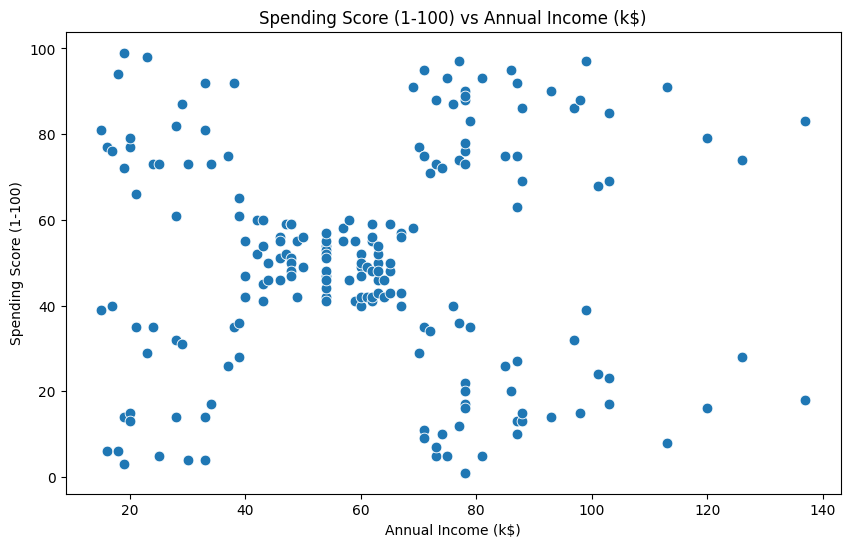

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [115]:
X = df.iloc[:,[2,3,4]].values

In [116]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init="k-means++")
    km.fit(X)
    wcss.append(km.inertia_)

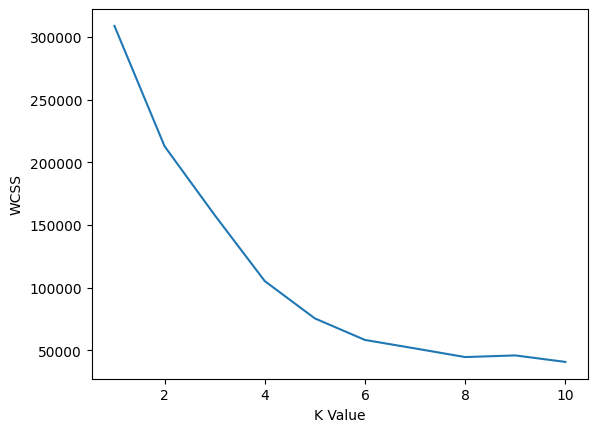

In [117]:
plt.plot(range(1,11),wcss)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [118]:
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df['Klabel'] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Klabel
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


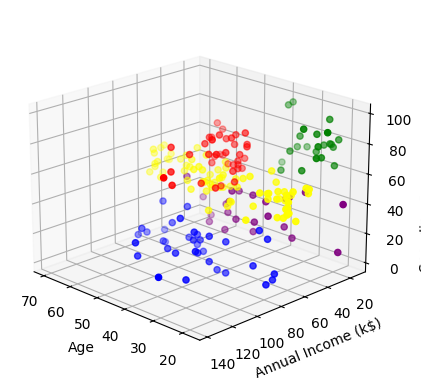

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Klabel == 0], df["Annual Income (k$)"][df.Klabel == 0], df["Spending Score (1-100)"][df.Klabel == 0], c='purple')
ax.scatter(df.Age[df.Klabel == 1], df["Annual Income (k$)"][df.Klabel == 1], df["Spending Score (1-100)"][df.Klabel == 1], c='red')
ax.scatter(df.Age[df.Klabel == 2], df["Annual Income (k$)"][df.Klabel == 2], df["Spending Score (1-100)"][df.Klabel == 2], c='blue')
ax.scatter(df.Age[df.Klabel == 3], df["Annual Income (k$)"][df.Klabel == 3], df["Spending Score (1-100)"][df.Klabel == 3], c='green')
ax.scatter(df.Age[df.Klabel == 4], df["Annual Income (k$)"][df.Klabel == 4], df["Spending Score (1-100)"][df.Klabel == 4], c='yellow')
ax.view_init(20, 135)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [120]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

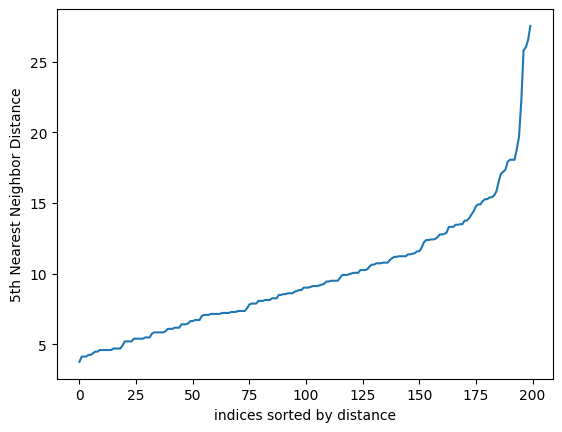

In [121]:
distances = np.sort(distances[:,-1])

plt.xlabel("indices sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.plot(distances)

In [137]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=13,min_samples=4)
dbscan.fit(X)
labels = dbscan.labels_
df["DBlabel"] = labels

In [129]:
"""
df_no_noise = df[df["DBlabel"] != -1]

from sklearn.metrics import silhouette_score
# DBSCAN with eps_9 (results in 8 clusters)
db_4 = DBSCAN(eps=9, min_samples=4)
labels_4 = db_4.fit_predict(X)

# DBSCAN with eps_10 (results in 4 clusters)
db_8 = DBSCAN(eps=10, min_samples=4)
labels_8 = db_8.fit_predict(X)

# Function to compute silhouette score (ignoring noise points)
def get_silhouette_score(X, labels):
    mask = labels != -1
    if len(set(labels[mask])) <= 1:
        return -1  # Not enough clusters
    return silhouette_score(X[mask], labels[mask])

# Get scores
score_4 = get_silhouette_score(X, labels_4)
score_8 = get_silhouette_score(X, labels_8)

print(f"Silhouette Score (4 clusters): {score_4:.4f}")
print(f"Silhouette Score (8 clusters): {score_8:.4f}")
"""

'\ndf_no_noise = df[df["DBlabel"] != -1]\n\nfrom sklearn.metrics import silhouette_score\n# DBSCAN with eps_9 (results in 8 clusters)\ndb_4 = DBSCAN(eps=9, min_samples=4)  \nlabels_4 = db_4.fit_predict(X)\n\n# DBSCAN with eps_10 (results in 4 clusters)\ndb_8 = DBSCAN(eps=10, min_samples=4) \nlabels_8 = db_8.fit_predict(X)\n\n# Function to compute silhouette score (ignoring noise points)\ndef get_silhouette_score(X, labels):\n    mask = labels != -1\n    if len(set(labels[mask])) <= 1:\n        return -1  # Not enough clusters\n    return silhouette_score(X[mask], labels[mask])\n\n# Get scores\nscore_4 = get_silhouette_score(X, labels_4)\nscore_8 = get_silhouette_score(X, labels_8)\n\nprint(f"Silhouette Score (4 clusters): {score_4:.4f}")\nprint(f"Silhouette Score (8 clusters): {score_8:.4f}")\n'

In [138]:
no_clusters = len(np.unique(df["DBlabel"]) )
no_noise = np.sum(np.array(df["DBlabel"]) == -1, axis=0)

print('Estimated no. of clusters: ' , no_clusters)
print('Estimated no. of noise points: ' , no_noise)

Estimated no. of clusters:  5
Estimated no. of noise points:  17


In [147]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Klabel,DBlabel
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,0,0


In [148]:
df.DBlabel.value_counts()

,count
DBlabel,
0,137
2,34
-1,17
1,8
3,4


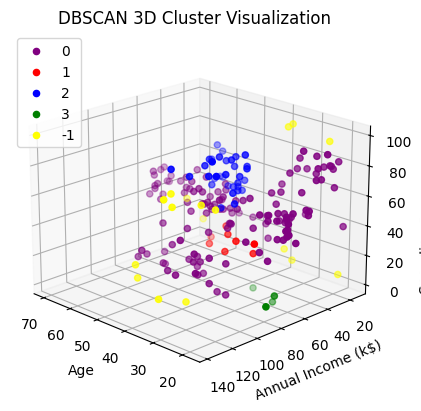

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.DBlabel == 0], df["Annual Income (k$)"][df.DBlabel == 0], df["Spending Score (1-100)"][df.DBlabel == 0], c='purple', label='0')
ax.scatter(df.Age[df.DBlabel == 1], df["Annual Income (k$)"][df.DBlabel == 1], df["Spending Score (1-100)"][df.DBlabel == 1], c='red', label='1')
ax.scatter(df.Age[df.DBlabel == 2], df["Annual Income (k$)"][df.DBlabel == 2], df["Spending Score (1-100)"][df.DBlabel == 2], c='blue', label='2')
ax.scatter(df.Age[df.DBlabel == 3], df["Annual Income (k$)"][df.DBlabel == 3], df["Spending Score (1-100)"][df.DBlabel == 3], c='green', label='3')
ax.scatter(df.Age[df.DBlabel == -1], df["Annual Income (k$)"][df.DBlabel == -1], df["Spending Score (1-100)"][df.DBlabel == -1], c='yellow', label='-1')

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("DBSCAN 3D Cluster Visualization")
ax.view_init(elev=20, azim=135)
ax.legend()

plt.show()

In [152]:
from sklearn.metrics import silhouette_score

mask = df.DBlabel != -1
X_db_no_noise = X[mask]
db_labels_no_noise = df.DBlabel[mask]

score_kmeans = silhouette_score(X, df.Klabel)
score_dbscan = silhouette_score(X_db_no_noise, db_labels_no_noise)
print(f"Silhouette Score (KMeans): {score_kmeans:.4f}")
print(f"Silhouette Score (DBSCAN): {score_dbscan:.4f}")

Silhouette Score (KMeans): 0.4443
Silhouette Score (DBSCAN): 0.2061
